In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#The Woods Saxon potential is
def V(R):
    """Woode-Saxon potential"""
    V0 = -61.1 #MeV
    A = 10 #mass of the core
    Rws = 1.2*A**(1/3) #fm
    aws = 0.65 #fm
    return V0/(1+np.exp((R-Rws)/aws))


def f(R,y,L,E):
    """Matrix solutions to RKmethod f(R,y)=(u(1),u(0)* [RHS equation 3.126])"""
    c1 = 197.32075 #MeV fm -> hc
    c2 = 0.0478450 #1/(MeV fm2) -> 2u/hbar2
    return np.array([[y[1,0]],[y[0,0]*(L*(L+1)/R**2 + c2*(V(R)-E))]])

def RKmethod(Rn=np.array([]),yn=np.array([[0],[1]]),Lval=0,Eval=0,a=0):
    """Runge-Kutta Method: It is initialized for u(0)=0 and u'(0)=1.
    The parameter "a" will help us identify the index for which r==a in the index notation."""
    u  = []
    up = [] #u'
    step_size = r_array[1]-r_array[0]
    for idx, Rn in enumerate(r_array):
        #define the parameters
        k1 = f(R=Rn,y=yn,L=Lval,E=Eval)
        k2 = f(R=Rn+0.5*step_size,y=yn+0.5*step_size*k1,L=Lval,E=Eval)
        k3 = f(R=Rn+0.5*step_size,y=yn+0.5*step_size*k2,L=Lval,E=Eval)
        k4 = f(R=Rn+step_size,y=yn+step_size*k3,L=Lval,E=Eval)
        #Redefine new functions
        yn = yn + (step_size/6)*(k1+2*k2+2*k3+k4)
        Rn = Rn + step_size
        u.append(yn[0,0])
        up.append(yn[1,0])
        if Rn==a:
            idx_a = idx 
    return u,up,idx_a #u(r)

def normalize(array_to_normalize):
    """ It normalizes an array from its maximum amplitude and will oscillate from [-1,1]"""
    normalized_array = array_to_normalize/max(array_to_normalize)
    return normalized_array

def Rmatrix(u,up,idx_a,a):
    """Equation 3.1.28"""
    # "a" is the outside the nuclear range when the potential is zero
    return u[idx_a]/up[idx_a]/a

def Hankel(R=0.1,k=0.5,L=0,sign=+1):
    return 1j**(-1*sign*L)*np.exp(sign*1j*R*k)

def Hankel_derivative(R=0.1,k=0.5,L=0,sign=+1):
    return 1j**(-1*sign*L)*np.exp(sign*1j*R*k)*(sign*1j*k)

def Smatrix(r,Rm,L,a):
    return ( 
        (Hankel(R=r,k=1,L=L,sign=-1) - a*Rm*Hankel_derivative(R=r,k=1,L=L,sign=-1)) /
            (Hankel(R=r,k=1,L=L,sign=1) - a*Rm*Hankel_derivative(R=r,k=1,L=L,sign=1)) 
    )

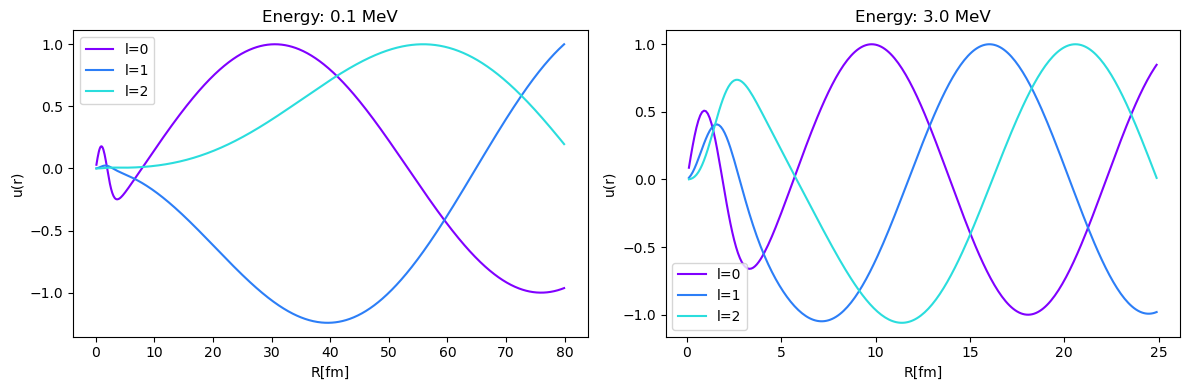

In [7]:
#Initial conditions
step_size = 0.1


a=10 #potential is zero ish

##Plot figures
fig, axs = plt.subplots(1,2,figsize=(12.0,4.0))
numbers_of_l = 3
energies = [0.1,3.0]
for idx,energy in enumerate(energies):
    color = iter(cm.rainbow(np.linspace(0,0.5,numbers_of_l+1)))
    c = next(color)
    
    #Define range of R limits
    if idx ==0: r_array = np.arange(0.1,80,step_size)
    else: r_array = np.arange(0.1,25,step_size)

    if idx ==0: axs[idx].set_title(f'Energy: {energy} MeV')
    else: axs[idx].set_title(f'Energy: {energy} MeV')

    for l in range(0,numbers_of_l):
        y,yp,idx_a = RKmethod(Rn=r_array,Lval=l,Eval=energy,a=a)
        Rl = Rmatrix(y,yp,idx_a,a)
        Sl = Smatrix(r=a,Rm=Rl,L=l,a=a)
        dl = 1/(2j)*np.log(Sl)
        y_norm = normalize(y)
        axs[idx].plot(r_array, y_norm,label=f"l={l}",color=c)
        axs[idx].set_xlabel("R[fm]")
        axs[idx].set_ylabel("u(r)")
        axs[idx].legend()
        c = next(color)

fig.tight_layout()
fig.savefig('radial_behaviour.png')

In [25]:
#Find an appropiate minimum for which V=0
A =10
Rws = 1.2*A**(1/3) 
print(Rws)

2.5853216280382605


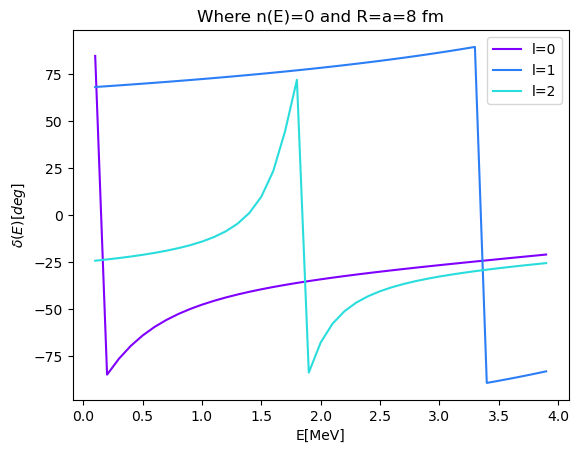

In [38]:
#Define ranges
energy_range = np.arange(0.1,4.0,0.1)
r_array = np.arange(0.1,100,step_size)

phase_shift = []
#Initial parameters
numbers_of_l = 3
#if we select the R=a for which V~0 for the nuclear range
a = 8
color = iter(cm.rainbow(np.linspace(0,0.5,numbers_of_l+1)))
c = next(color)
for energy in energy_range:
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=0,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=0,a=a)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=0',c=c)

phase_shift = []
for energy in energy_range:
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=1,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=1,a=a)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=1',c=c)


phase_shift = []
for energy in energy_range:
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=2,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=2,a=a)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)
    
c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=2',c=c)

plt.title(f"Where n(E)=0 and R=a={a} fm")
plt.ylabel(r'$\delta(E) [deg]$')
plt.xlabel(r'E[MeV]')
plt.legend()
plt.savefig('phase_shift_a8.png')
plt.show()

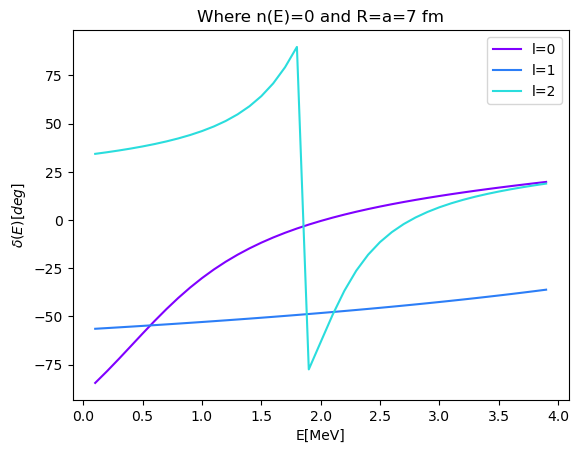

In [39]:
#Define ranges
energy_range = np.arange(0.1,4.0,0.1)
r_array = np.arange(0.1,100,step_size)

phase_shift = []
#Initial parameters
numbers_of_l = 3
#if we select the R=a for which V~0 for the nuclear range
a = 7
color = iter(cm.rainbow(np.linspace(0,0.5,numbers_of_l+1)))
c = next(color)
for energy in energy_range:
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=0,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=0,a=a)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=0',c=c)

phase_shift = []
for energy in energy_range:
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=1,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=1,a=a)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)

c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=1',c=c)


phase_shift = []
for energy in energy_range:
    y_l0, yp_l0, idx_a = RKmethod(Rn=r_array,Lval=2,Eval=energy,a=a)
    R_l0 = Rmatrix(y_l0,yp_l0,idx_a,a)
    S_l0 = Smatrix(r=a,Rm=R_l0,L=2,a=a)
    d_l0 = 1/(2j)*np.log(S_l0)
    phase_shift.append(d_l0)
    
c = next(color)
plt.plot(energy_range,np.rad2deg(np.real(phase_shift)),label='l=2',c=c)

plt.title(f"Where n(E)=0 and R=a={a} fm")
plt.ylabel(r'$\delta(E) [deg]$')
plt.xlabel(r'E[MeV]')
plt.legend()

plt.savefig(f'phase_shift_a{a}.png')
plt.show()